In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

In [2]:
df = pd.read_csv('source/FReDA4.csv')

In [3]:
couples_agreement = df[df["Group3"] == "Couple Agreement"].copy()
couples_deprived = df[df["Group3"] == "Couple Deprivation"].copy()
couples_saturated = df[df["Group3"] == "Couple Saturation"].copy()
couples_mixed = df[df["Group3"] == "Couple Mixed"].copy()

# subjects_deprived = df[df["Group1"] == "SubGroup2"].copy()
# subjects_saturated = df[df["Group1"] == "SubGroup5"].copy()

In [4]:
target = df
#
# target = couples_mixed[couples_mixed["Sex"] == 0].copy()
summary = target["Age"].agg(['mean', 'std', 'min', 'max'])
print(summary)

pivot = target.pivot(index='CoupleId', columns='Role', values='Age')
pivot['AgeDiff'] = (pivot['Anchor'] - pivot['Partner']).abs()

diff = {
    'Mean': pivot['AgeDiff'].mean(),
    'SD': pivot['AgeDiff'].std(),
    'Min': pivot['AgeDiff'].min(),
    'Max': pivot['AgeDiff'].max()
}

print(diff)

mean    36.678309
std      8.535059
min     18.000000
max     79.000000
Name: Age, dtype: float64
{'Mean': np.float64(3.4975), 'SD': np.float64(3.605285245745702), 'Min': np.int64(0), 'Max': np.int64(48)}


In [5]:
target = df
# target = couples_mixed[couples_mixed["Sex"] == 0].copy()

couples = len(target)
married = (target["Married"] == 1).sum()
kids = (target["Kids"] >= 1).sum()
together = (target["Cohabitation"] >= 1).sum()
orientation = (target["Relationship Sex"] >= 1).sum()
work = (target["Work Status"] >= 1).sum()

per_married = married * 100 / couples
per_kids = kids * 100 / couples
per_together = together * 100 / couples
per_orientation = orientation * 100 / couples
per_work = work * 100 / couples

# target["Education"].value_counts()

# new_df = target[target["Sex"] == 1].copy()
target["Married"].value_counts()
# target["Sex"].isna().sum()
# print(summary)

Married
1.0    8774
0.0    4824
Name: count, dtype: int64

In [14]:
touch_factors = [
    'Frequency of Touch',
    'Wish for Touch',
]

individual_factors = [
    'Sex',
    'Age',
    'Work Status',
]

personality_factors = [
    'Neuroticism',
    'Extraversion',
    'Conscientiousness',
    'Openness',
    'Agreeableness',
]

wellbeing_factors = [
    'Depressiveness',
    'Loneliness',
    'Self-esteem',
    'Life Satisfaction',
    'Health',
]
relationship_factors = [
    'Relationship Length',
    'Age difference',
    'Married',
    'Cohabitation',
    'Kids',

    'Relationship Satisfaction',
    'Communication Quality',
    'Conflict Management',
]


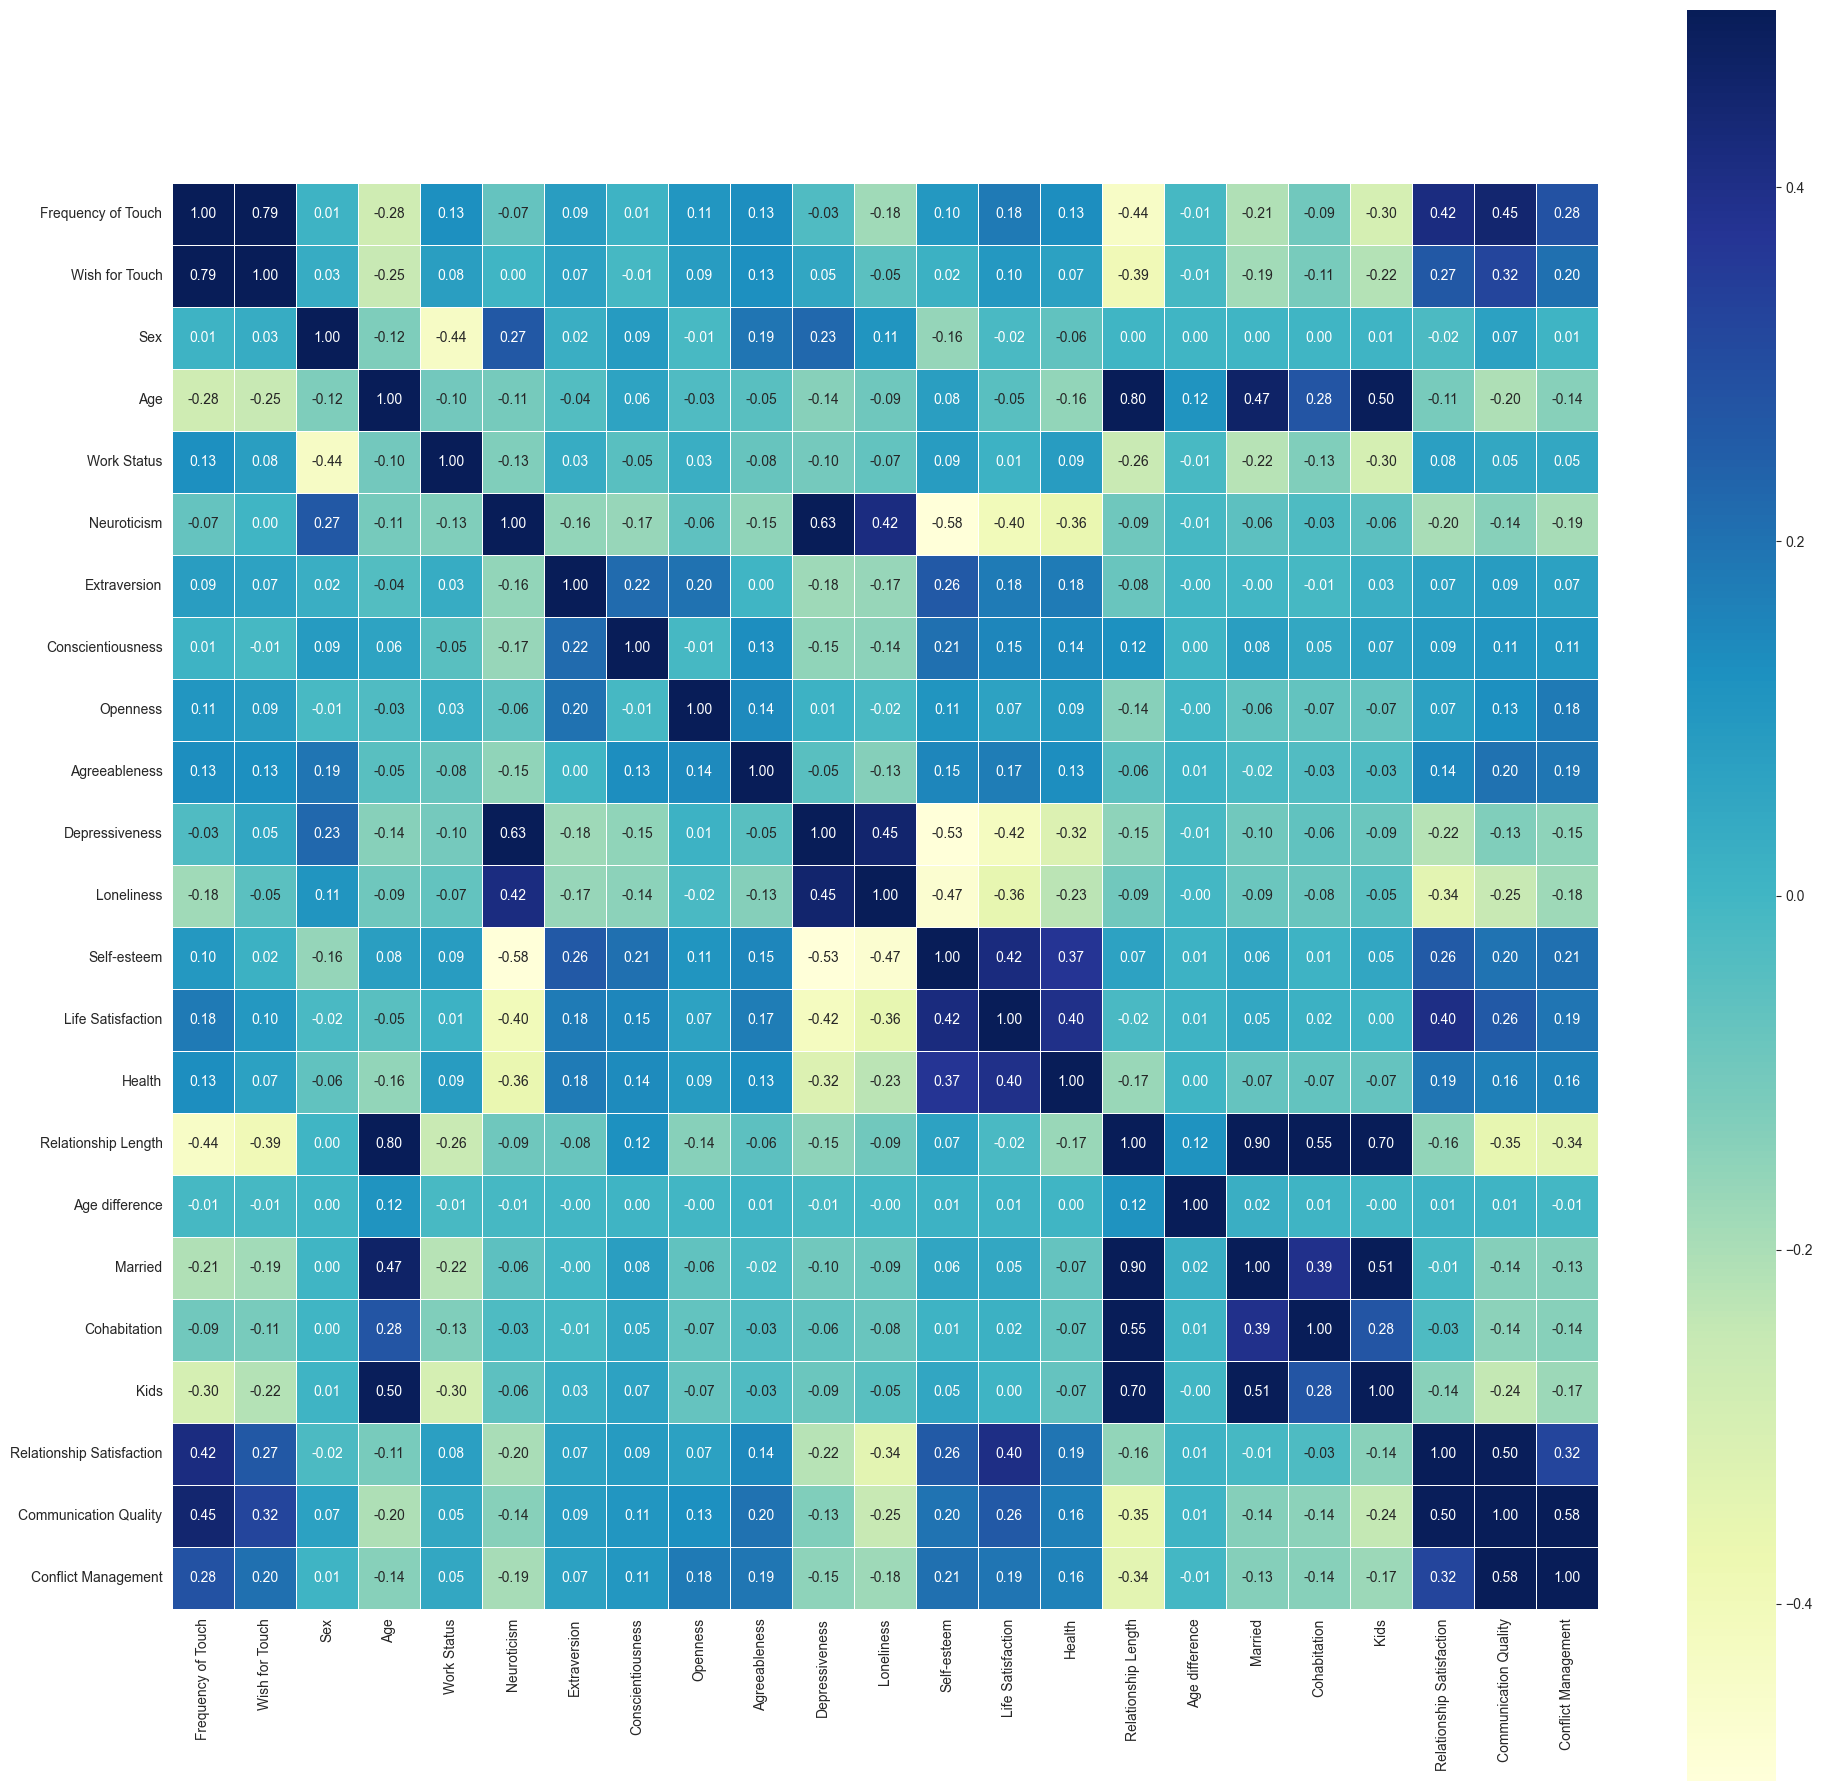

In [15]:
correlation = df[
    touch_factors +
    individual_factors +
    personality_factors +
    wellbeing_factors +
    relationship_factors
    ].corr(method='spearman')

num_vars = len(correlation.columns)
square_size = 1  # in inches, per cell

fig_width = num_vars * square_size
fig_height = num_vars * square_size

plt.figure(figsize=(fig_width, fig_height))

sns.heatmap(correlation, cmap='YlGnBu',
            fmt='.2f',
            linewidths=0.5,
            vmax=0.5,
            vmin=-0.5,
            annot_kws={"size": 10},
            annot=True,
            square=True
            )

plt.grid(False)
plt.savefig('output/img_bg/poster/correlation.png', dpi=600, transparent=False, bbox_inches='tight')